In [263]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd

In [264]:
data = pd.read_csv('tarefasDetalhe.csv')

In [265]:
data['Start'] = pd.to_datetime(data['Start'], format='%Y-%m-%d %H:%M:%S')
data['Finish'] = pd.to_datetime(data['Finish'], format='%Y-%m-%d %H:%M:%S')

In [266]:
def sprint_date(value,sprint=1,init_date='2021/06/07', sprint_size=14):
    init_date = datetime.strptime(init_date, '%Y/%m/%d')
    value = datetime.strptime(value, '%Y-%m-%d') if type(value) != pd.Timestamp and pd.notnull(value) else value

    while init_date <= value:
        init_date = init_date + timedelta(sprint_size)
        sprint = sprint+1

    return sprint-1

data['Sprint_calc'] = data['Finish'].apply(sprint_date)

In [267]:
def correct_duration(x):
  x = str(x)
  size_x = len(x)
  if size_x >6 and size_x<8:
    return x[:2]
  elif size_x >5 and size_x < 7:
    return x[0]

data['Duration'] = data['Duration'].apply(correct_duration)

In [268]:
data['target'] = -99

for linha in range(len(data)):
    dias_da_semana = 7
    data_hoje = datetime.now()
    if data.loc[linha, 'Finish']<data_hoje:
        data.loc[linha, 'target'] = 1
    else:
        data.loc[linha, 'target'] = (data_hoje - data.loc[linha, 'Start'])/dias_da_semana


In [269]:
data['target_semanal'] = data['Duration'].apply(lambda x: int(x)/5 if x != None else x)

In [270]:
tarefas_concluidas = data[(data['target']==1)&(data['% complete']==1)]

In [271]:
tarefas_atrasadas = data[(data['target']==1)&(data['% complete']!=1)]

In [272]:
tarefas_adiantadas = data[(data['target']!=1)&(data['% complete']!=0)]

In [273]:
tarefas_balaceadas = int(tarefas_adiantadas_percentual + tarefas_atrasadas_percentual)

In [274]:
numero_tarefas_concluidas + tarefas_balaceadas

9

**New Table**

In [275]:
sprints = data['Sprint_calc'].value_counts().to_frame()
sprints.columns = ['count_task']

In [276]:
count_task_concluded = tarefas_concluidas.groupby(by='Sprint_calc').sum()['% complete'].to_frame()
count_task_concluded.columns = ['task_concluded']

In [277]:
count_task_late = tarefas_atrasadas.groupby(by='Sprint_calc').sum()['% complete'].to_frame()
count_task_late.columns = ['task_late']

In [278]:
count_task_advanced = tarefas_adiantadas.groupby(by='Sprint_calc').sum()['% complete'].to_frame()
count_task_advanced.columns = ['task_advanced']

In [279]:
table_summary = sprints.join(column_task_concluded)\
.join(count_task_late)\
.join(count_task_advanced)\
.sort_index()

In [280]:
table_summary.fillna(0, inplace=True)
table_summary.drop(0, inplace=True)
table_summary.index.name = 'sprint'

In [281]:
for i in table_summary.index:
  if table_summary.loc[i,'task_late'] != 0:
    table_summary.loc[i,'diference'] = table_summary.loc[i,'count_task'] - (table_summary.loc[i,'task_concluded'] + table_summary.loc[i,'task_advanced'] + (1 - table_summary.loc[i,'task_late']))
    #table_summary.loc[i,'yield'] = table_summary.loc[i,'task_concluded'] + table_summary.loc[i,'task_advanced'] + (1 - table_summary.loc[i,'task_late'])

  else:
    table_summary.loc[i,'diference'] = table_summary.loc[i,'count_task'] - (table_summary.loc[i,'task_concluded'] + table_summary.loc[i,'task_advanced'])
    #table_summary.loc[i,'yield'] = table_summary.loc[i,'task_concluded'] + table_summary.loc[i,'task_advanced']


In [282]:
sum_task_concluded = table_summary['task_concluded'].sum()
sum_task_advanced = table_summary['task_advanced'].sum()
sum_task_late = table_summary['task_late'].sum()

count_task_late = len(table_summary[table_summary['task_late']!=0])
dif_task_late = count_task_late - sum_task_late

Task_balance = int( sum_task_concluded + sum_task_advanced + dif_task_late )

print(f"Temos {Task_balance} tarefas concluídas")

Temos 9 tarefas concluídas


In [283]:
table_summary['debtor'] = table_summary['diference'].cumsum()

In [284]:
table_summary

,count_task,task_concluded,task_late,task_advanced,diference,yield,debtor
sprint,,,,,,,
1,1,1.0,0.00,0.0,0.00,1.00,0.00
3,3,3.0,0.00,0.0,0.00,3.00,0.00
4,1,1.0,0.00,0.0,0.00,1.00,0.00
5,3,0.0,0.65,0.0,2.65,0.35,2.65
6,4,0.0,0.00,2.9,1.10,2.90,3.75
8,6,0.0,0.00,0.8,5.20,0.80,8.95
9,1,0.0,0.00,0.0,1.00,0.00,9.95
10,4,0.0,0.00,0.0,4.00,0.00,13.95
11,4,0.0,0.00,0.0,4.00,0.00,17.95


**Charts**

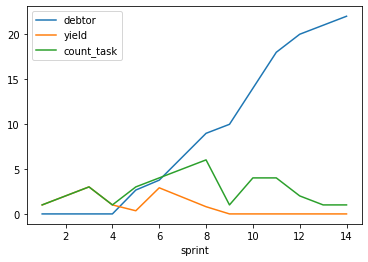

In [288]:
table_summary[['debtor','yield', 'count_task']].plot(kind='line')

In [286]:
'''def sprint_date(value,sprint=1,init_date='2021/01/04', sprint_size=14):
  init_date = datetime.strptime(init_date, '%Y/%m/%d')
  value = datetime.strptime(value, '%Y/%m/%d') if type(value) != pd.Timestamp and pd.notnull(value) else value
  while init_date <= value:
    init_date = init_date + timedelta(sprint_size)
    sprint = sprint+1
  
  return sprint-1
'''

"def sprint_date(value,sprint=1,init_date='2021/01/04', sprint_size=14):\n  init_date = datetime.strptime(init_date, '%Y/%m/%d')\n  value = datetime.strptime(value, '%Y/%m/%d') if type(value) != pd.Timestamp and pd.notnull(value) else value\n  while init_date <= value:\n    init_date = init_date + timedelta(sprint_size)\n    sprint = sprint+1\n  \n  return sprint-1\n"